In [19]:
# Mašininis mokymasis

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

In [21]:
# scores = cross_validate(model, X, y, cv=10, scoring=('r2', 'max_error'))

In [22]:
# scores = cross_val_score(model, X, y, cv=10) 

In [23]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM aruodas;'  # SQL užklausa, kurią norite vykdyti

aruodas = query_to_dataframe(db_path, query); aruodas

,id,Miestas,Kaina,Adresas,Namo numeris,Buto numeris,Plotas,Kambarių sk.,Aukštas,Aukštų sk.,...,Tipas,Ypatybės,Papildomos patalpos,Papildoma įranga,Apsauga,Unikalus daikto numeris (RC numeris),Objektas,Kaina mėn.,Bendros erdvės pastate,Coord
0,1,"Vilnius, ŽirmūnaiRiterių g.",165000,"Vilnius, Žirmūnai, Riterių g., 2 kambarių butas",10,127,"40,52 m²",2,5,8,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(54.71684325, 25.291961476410883)"
1,2,"Palanga, PalangaA. Mickevičiaus g.",268000,"Palanga, Palanga, A. Mickevičiaus g., 2 kambar...",None,None,35 m²,2,1,3,...,Butai pardavimui,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None,None,None,None,"(55.9171652, 21.0597236)"
2,3,"Vilnius, PašilaičiaiPerkūnkiemio g.",163000,"Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...",53,None,67 m²,3,8,12,...,Butai pardavimui,Tualetas ir vonia atskirai\nInternetas\nKabeli...,Sandėliukas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.737668150000005, 25.213011185027476)"
3,4,"Palanga, PalangaMedvalakio g.",62800,"Palanga, Palanga, Medvalakio g., 2 kambarių butas",27,None,"26,2 m²",2,1,2,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
4,5,"Palanga, PalangaMedvalakio g.",27700,"Palanga, Palanga, Medvalakio g., 1 kambario butas",27,None,14 m²,1,2,2,...,Butai pardavimui,None,None,None,Šarvuotos durys,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,13264,"Klaipėda, CentrasTaikos pr.",1600,"Klaipėda, Centras, Taikos pr., 3 kambarių buto...",32A,None,"97,19 m²",3,4,20,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Balkonas\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,1 600 €,None,"(55.6963372, 21.148903157410295)"
13264,13265,"Kaunas, CentrasMiško g.",700,"Kaunas, Centras, Miško g., 2 kambarių buto nuoma",2,None,50 m²,2,3,3,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nDrabužinė,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,700 €,None,"(54.89371025, 23.92445922114075)"
13265,13266,"Vilnius, FabijoniškėsP. Žadeikos g.",350,"Vilnius, Fabijoniškės, P. Žadeikos g., 1 kamba...",None,None,40 m²,1,1,9,...,Butai nuomai,None,None,None,None,None,None,350 €,None,"(54.731962, 25.2433514)"
13266,13267,"Vilnius, Naujoji VilniaDūmų g.",250,"Vilnius, Naujoji Vilnia, Dūmų g., 1 kambario b...",3,None,20 m²,1,3,3,...,Butai nuomai,Atskiras įėjimas\nNauja kanalizacija\nNauja el...,Vieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None,None,250 €,None,"(54.69285295, 25.400292867500028)"


In [24]:
df = pd.read_csv('../../../insurance.csv'); df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
l = LabelEncoder().fit_transform(df['sex']); l[:5]
df['lytis'] = l; df.head()

,age,sex,bmi,children,smoker,region,charges,lytis
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [26]:
le = LabelEncoder()
l = le.fit_transform(df['sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [27]:
# a)  Parašyti kainos prognozės skriptą, kuris prognozuotų būsto kainą. Naudoti Linearregression
# kategorines vertes užkoduoti su LabelEncoder'iu
# b) Iš autoplius duomenų pasirinkti 7-8 parametrus ir parašyti skriptą automobilio vertės nustatymui
# su score parametru įvertintkite tikslumą

In [28]:
def sildymas(x):
    if x == None:
        return x
    else:
        if len(x.split(',')) == 1:
            return x.split(',')[0]
        else: 
            return 'Hibridinis'
        
def amzius(x):
    if x == None:
        return x
    else:
        if int(x)>=2024:
            return 0
        else:
            return 2024-int(x)

In [29]:
aruodas_df = aruodas
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(' ')[0].split(',')[0])
aruodas_df['Mikrorajonas'] = aruodas_df['Adresas'].apply(lambda x: x.split(',')[1])
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Šildymo_tipas'] = aruodas_df['Šildymas'].apply(sildymas)
aruodas_df['Metai_n'] = aruodas_df['Metai'].apply(lambda x: int(x[:4]) if x != None else x)

In [30]:
l2 = LabelEncoder().fit_transform(aruodas_df['Miestas_n'])
l2_dict = dict(zip(aruodas_df['Miestas_n'],l2))
l3 = LabelEncoder().fit_transform(aruodas_df['Įrengimas'])
l3_dict = dict(zip(aruodas_df['Įrengimas'],l3))
l4 = LabelEncoder().fit_transform(aruodas_df['Šildymo_tipas'])
l4_dict = dict(zip(aruodas_df['Šildymo_tipas'],l4))
l5 = LabelEncoder().fit_transform(aruodas_df['Pastato tipas'])
l5_dict = dict(zip(aruodas_df['Pastato tipas'],l5))
aruodas_df['Miestas_enc'] = l2
aruodas_df['Įrengimas_enc'] = l3
aruodas_df['Šildymo_tipas_enc'] = l4
aruodas_df['Pastato tipas_enc'] = l5

In [31]:
check_df = aruodas_df[['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.', 'Kaina_n', 'Tipas']]
check_df.dropna(inplace=True)
X = check_df[check_df['Tipas'] == 'Butai pardavimui'][['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.']]
y = check_df[check_df['Tipas'] == 'Butai pardavimui']['Kaina_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

60.22721571547823

In [32]:
print(l2_dict)

{'Vilnius': 96, 'Palanga': 33, 'Kaunas': 14, 'Klaipėda': 21, 'PalangaUžkanavės': 65, 'Kauno': 18, 'PalangaVasaros': 69, 'Neringos': 30, 'Panevėžys': 79, 'Telšių': 89, 'Plungės': 81, 'Kretingos': 23, 'Širvintų': 107, 'Rietavo': 85, 'Elektrėnų': 7, 'Švenčionių': 108, 'Akmenės': 0, 'Klaipėdos': 22, 'Alytus': 2, 'Skuodo': 87, 'Mažeikių': 28, 'Šakių': 101, 'Trakų': 90, 'Šiauliai': 103, 'Radviliškio': 83, 'Vilniaus': 95, 'Šilutės': 106, 'Druskininkų': 6, 'Visagino': 99, 'Ukmergės': 91, 'Pakruojo': 32, 'Varėnos': 93, 'Pagėgių': 31, 'Šiaulių': 104, 'Jonavos': 9, 'Ignalinos': 8, 'Molėtų': 29, 'Tauragės': 88, 'Biržų': 5, 'Birštono': 4, 'Panevėžio': 78, 'Anykščių': 3, 'Kėdainių': 25, 'Marijampolės': 27, 'PalangaAido': 35, 'Jurbarko': 11, 'Zarasų': 100, 'Kaišiadorių': 12, 'Šalčininkų': 102, 'Vilkaviškio': 94, 'Raseinių': 84, 'Lazdijų': 26, 'Kelmės': 20, 'Šilalės': 105, 'Rokiškio': 86, 'Prienų': 82, 'Kazlų': 19, 'Joniškio': 10, 'Pasvalio': 80, 'Kupiškio': 24, 'Kalvarijos': 13, 'Utenos': 92, 'Palang

In [33]:
list(set(l3_dict.keys()))

[None, 'Nebaigtas statyti', 'Kita', 'Neįrengtas', 'Dalinė apdaila', 'Įrengtas']

In [34]:
# Iškodavimas
# label_encoder = LabelEncoder()
# encoded_data = label_encoder.fit_transform(data)
# print(“Category Mapping:”, dict(zip(data, encoded_data))).

In [35]:
rep = True
if rep:
    try:
        rep = True
        x = np.nan
        miestas = np.nan
        irengimas = np.nan     
        sildymo_tipas = np.nan
        pastato_tipas = np.nan
        plotas = np.nan
        metai = np.nan
        kambariai = np.nan
        aukstas = np.nan
        aukstai = np.nan
        m = input('Nurodykite buto miestą')
        miestas = l2_dict[m]
        print(m, miestas)
        i = input(f'Įveskite vieną iš įrengimo variantų, variantai: {list(set(l3_dict.keys()))}')
        irengimas = l3_dict[i]
        print(i, irengimas)
        s = input(f'Įveskite vieną iš šildymo tipų variantų, variantai: {list(set(l4_dict.keys()))}')
        sildymo_tipas = l4_dict[s]
        print(s, sildymo_tipas)
        p = input(f'Įveskite vieną iš pastato tipų variantų, variantai: {list(set(l5_dict.keys()))}')
        pastato_tipas = l5_dict[p]
        print(p, pastato_tipas)
        plotas = float(input('Nurodykite buto plotą'))
        print(plotas)
        metai = int(input('Nurodykite buto metus'))
        print(metai)
        kambariai = int(input('Nurodykite buto kambarių skaičių'))
        print(kambariai)
        aukstas = int(input('Nurodykite buto aukštą'))
        print(aukstas)
        aukstai = int(input('Nurodykite daugiabučio aukštų skaičių'))
        print(aukstai)
        rep = False
    except Exception as e:
        print(e)
    
x = fit.predict(np.reshape([miestas,irengimas, sildymo_tipas, pastato_tipas, plotas, metai, kambariai, aukstas, aukstai], (1,-1)))[0]
print(f'{round(x,0)} EUR')

Kaunas 14
Kita 1
Dujinis 3
Karkasinis 1
70.0
1964
3
4
5
108367.0 EUR


In [36]:
check_df = aruodas_df[aruodas_df['Tipas'] == 'Butai nuomai'][['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.', 'Kaina_n']]
check_df.dropna(inplace=True)
X = check_df[['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.']]
y = check_df['Kaina_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

-799.0855662215223

<Axes: >

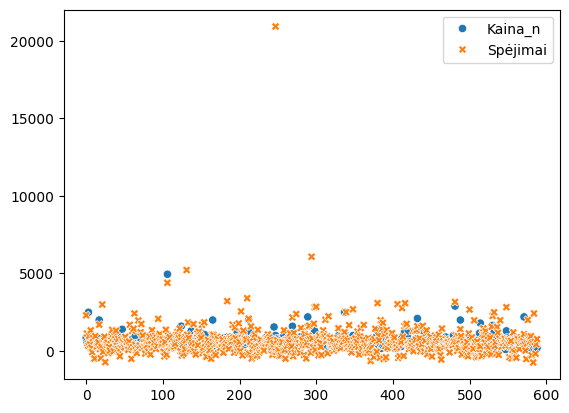

In [37]:
spejimai = pd.Series(data=pred, name='Spėjimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head()
sns.scatterplot(data=res)

In [38]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM autopliuslt2;'  # SQL užklausa, kurią norite vykdyti

autoplius = query_to_dataframe(db_path, query); autoplius

,id,Markė,Modelis,Kaina,Miestas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,...,"CO₂ emisija, g/km",Mieste,Užmiestyje,Vidutinės,Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis
0,1,-Kita-,-kita-,1750,"Utena, Lietuva",2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,...,None,None,None,None,None,None,None,None,None,None
1,2,-Kita-,-kita-,3900,"Jurbarkas, Lietuva",2011,Elektra,Sedanas,2/3,None,...,None,None,None,None,None,None,None,None,None,None
2,3,-Kita-,-kita-,6800,"Kėdainiai, Lietuva",2020-02,Elektra,Hečbekas,2/3,None,...,None,None,None,None,None,None,None,None,None,None
3,4,-Kita-,-kita-,60500,"Vilnius, Lietuva",2024,Elektra,Krovininis mikroautobusas,4/5,None,...,None,None,None,None,None,None,None,None,None,None
4,5,Abarth,124 Spider,18900,"Kaunas, Lietuva",2017,Benzinas,Kabrioletas,2/3,Mechaninė,...,148 g/km,"8,5","5,1","6,4",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39440,39441,Volvo,XC60,29000,"Klaipėda, Lietuva",2019,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,241 g/km,"9,5","6,5","7,5",None,None,None,None,None,None
39441,39442,Volvo,XC90,29700,"Trakai, Lietuva",2019-02,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,None,11,8,9,None,None,None,None,None,None
39442,39443,Volvo,XC90,29800,"Vilnius, Lietuva",2019,Dyzelinas,Visureigis / Krosoveris,4/5,Automatinė,...,149 g/km,"6,2","5,4","5,7",None,None,None,None,None,None
39443,39444,Volvo,XC40,29850,"Plungė, Lietuva",2022-05,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,~ 174 g/km,None,None,None,None,None,None,None,None,None


In [39]:
   
def kw(x):
    if x != None:
        if 'kW' in x:
            return int(x.split('(')[1].replace('kW)',''))
        else:
            return None
    else:
        return None

In [40]:
dft = autoplius
dft['Kaina'] = dft['Kaina'].apply(lambda x: float(x))
dft['Rida'] = dft['Rida'].apply(lambda x: x[:-3].replace(' ','') if x != None else x)
dft['Rida'] = dft['Rida'].apply(lambda x: float(x) if x!= None and x!='' else x )
dft['Amžius'] = dft['Pirma registracija'].apply(lambda x: int(2024-int(x[:4])) if x!= None else x)
dft['Galingumas'] = dft['Variklis'].apply(kw)
dft['Tik Miestas'] = dft['Miestas'].apply(lambda x: x.split(',')[0] if x!=None else None)

In [41]:
l2 = LabelEncoder().fit_transform(dft['Markė'])
l2_dict = dict(zip(dft['Markė'],l2))
l3 = LabelEncoder().fit_transform(dft['Modelis'])
l3_dict = dict(zip(dft['Modelis'],l3))
l4 = LabelEncoder().fit_transform(dft['Tik Miestas'])
l4_dict = dict(zip(dft['Tik Miestas'],l4))
l5 = LabelEncoder().fit_transform(dft['Kuro tipas'])
l5_dict = dict(zip(dft['Kuro tipas'],l5))
l6 = LabelEncoder().fit_transform(dft['Kėbulo tipas'])
l6_dict = dict(zip(dft['Kėbulo tipas'],l5))


In [42]:
# Polinominė regresija

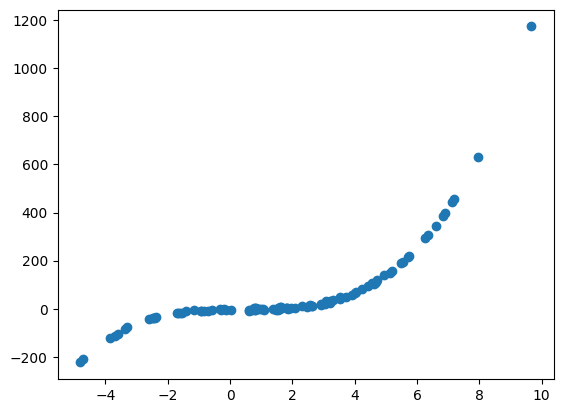

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
x = 2-3*np.random.normal(0,1,100)
y = x-2*(x**2)+1.5*(x**3)+np.random.normal(-3,3,100)
x = x[:, np.newaxis]

plt.scatter(x,y)
plt.show()

In [44]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

In [45]:
# modelio kūrimas
model = LinearRegression()
model.fit(x_poly, y)


LinearRegression()

In [46]:
y_poly_pred = model.predict(x_poly)

In [47]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r = model.score(x_poly, y)
print('rmse', rmse, 'r2', r, sep='\t')

rmse	3.072743608208423	r2	0.9996788340617946


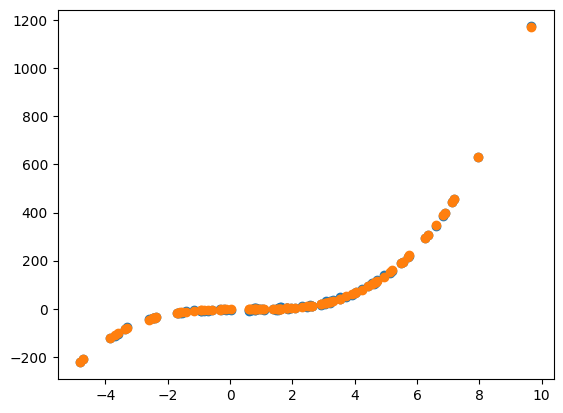

In [48]:
plt.scatter(x,y)
plt.scatter(x, y_poly_pred)
plt.show()

In [49]:
# Logistinė regresija

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# split the train and test dataset
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


In [51]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0])

<Axes: >

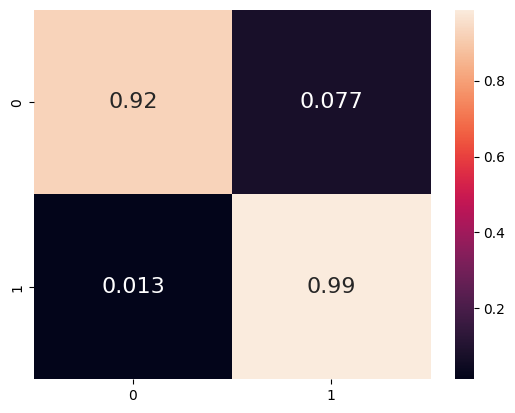

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [53]:
# pip install kagglehub

In [54]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
print("Path to dataset files:", path)
df = pd.read_csv(path+"/loan_data.csv"); df.head()

Path to dataset files: C:\Users\manta\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [55]:
check_df = df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']]; check_df


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [59]:
X = check_df.drop(columns=['loan_status'])
y = check_df['loan_status']

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 81.69999999999999


In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

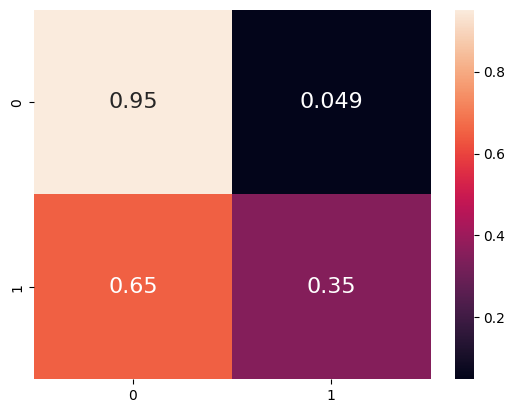

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [62]:
ndf = df
l2 = LabelEncoder().fit_transform(ndf['person_gender'])
l3 = LabelEncoder().fit_transform(ndf['person_education'])
l4 = LabelEncoder().fit_transform(ndf['person_home_ownership'])
l5 = LabelEncoder().fit_transform(ndf['loan_intent'])
l6 = LabelEncoder().fit_transform(ndf['previous_loan_defaults_on_file'])
ndf['person_gender'] = l2
ndf['person_education'] = l3
ndf['person_home_ownership'] = l4
ndf['loan_intent'] = l5
ndf['previous_loan_defaults_on_file'] = l6

In [63]:
X = ndf.drop(columns=['loan_status'])
y = ndf['loan_status']

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 82.74444444444444


<Axes: >

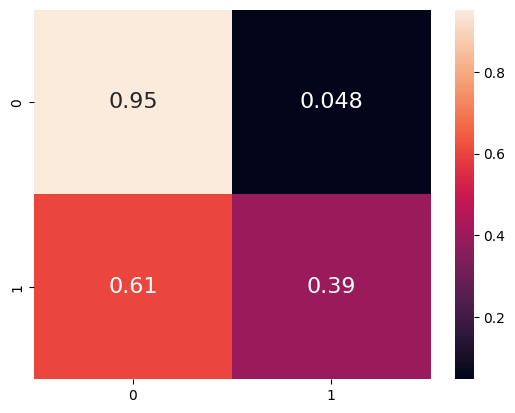

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})